 **Importing Necessary Packages**

In [128]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import Activation
import tensorflow as tf

**Importing MNIST Dataset**

In [129]:
#download mnist data and split into train and test sets

(X_train, y_train), (X_test, y_test) = mnist.load_data()

**See a Sample Image in the dataset along with its shape and label/annotation**


Image Shape: (28, 28) Label: 0


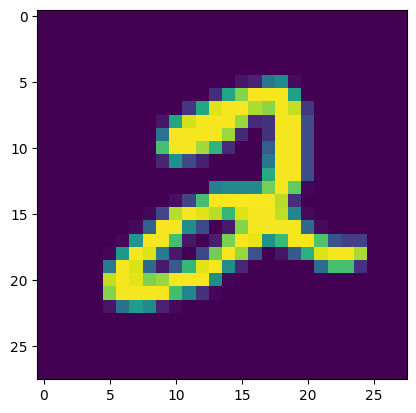

In [130]:
#plot the first image in the dataset
plt.imshow(X_train[5])
#check image shape
print("Image Shape:",X_train[1].shape, "Label:", y_train[1])



**Reshaping the data to represent 1-channel**

In [131]:
#reshape data to fit model

print("Original Shape:",X_train[0].shape)
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
print("Modified Shape:",X_train[0].shape)

Original Shape: (28, 28)
Modified Shape: (28, 28, 1)


**Change Labels to categorical for categorical-crossentropy loss**

In [132]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[7]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

**You CNN Model**

In [133]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import Activation
from keras.utils import to_categorical
#create model
# model = Sequential()
# #add model layers
# model.add(Conv2D(64, kernel_size=6,activation='relu', input_shape=(28,28,1)))  #activation=tf.nn.relu
# #model.add(Conv2D(128, kernel_size=6,activation='relu', input_shape=(28,28,1)))  #activation=tf.nn.relu

# #added another convolution layer
# #model.add(Conv2D(32, kernel_size=3, activation='relu'))

# model.add(Conv2D(32, kernel_size=6, activation='relu'))
# #model.add(Conv2D(64, kernel_size=6, activation='relu'))
# model.add(Flatten())
# model.add(Dense(10, activation='softmax'))

#sigmoid activation
# Create model
#model_sigmoid = Sequential()

# Add model layers with sigmoid activation
#model_sigmoid.add(Conv2D(64, kernel_size=3, activation='sigmoid', input_shape=(28, 28, 1)))
#model_sigmoid.add(Conv2D(32, kernel_size=3, activation='sigmoid'))
#model_sigmoid.add(Flatten())
#model_sigmoid.add(Dense(10, activation='softmax'))


# # #TanH activation
# # Create model
# model_tanh = Sequential()

# # # Add model layers with tanh activation
# model_tanh.add(Conv2D(64, kernel_size=3, activation='tanh', input_shape=(28, 28, 1)))
# model_tanh.add(Conv2D(32, kernel_size=3, activation='tanh'))
# model_tanh.add(Flatten())
# model_tanh.add(Dense(10, activation='softmax'))


# Create model
model_softplus = Sequential()

# Add model layers with softplus activation
model_softplus.add(Conv2D(64, kernel_size=3, activation='softplus', input_shape=(28, 28, 1)))
model_softplus.add(Conv2D(32, kernel_size=3, activation='softplus'))
model_softplus.add(Flatten())
model_softplus.add(Dense(10, activation='softmax'))

**Compile your model with correct hyperparameters before you can train and test it**

In [134]:
#compile model using accuracy to measure model performance
#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.25), loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.50), loss='categorical_crossentropy', metrics=['accuracy'])

#sigmoid activation
#model_sigmoid.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

#Compile model
#model_tanh.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Compile model
model_softplus.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

**Now, let's train the model with correct hyperparameters. The validation data will test the model after each epoch**

In [135]:
#train the model
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=1)

**Testing the Trained model**

In [136]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 23, 23, 64)        2368      
                                                                 
 conv2d_16 (Conv2D)          (None, 18, 18, 32)        73760     
                                                                 
 flatten_7 (Flatten)         (None, 10368)             0         
                                                                 
 dense_7 (Dense)             (None, 10)                103690    
                                                                 
Total params: 179,818
Trainable params: 179,818
Non-trainable params: 0
_________________________________________________________________


Epoch 1/2
30000/30000 [==============================] - 90s 3ms/step - loss: 2.5662 - accuracy: 0.0984 - val_loss: 2.4374 - val_accuracy: 0.0982
Epoch 2/2
30000/30000 [==============================] - 90s 3ms/step - loss: 2.5675 - accuracy: 0.1011 - val_loss: 2.4249 - val_accuracy: 0.0980
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


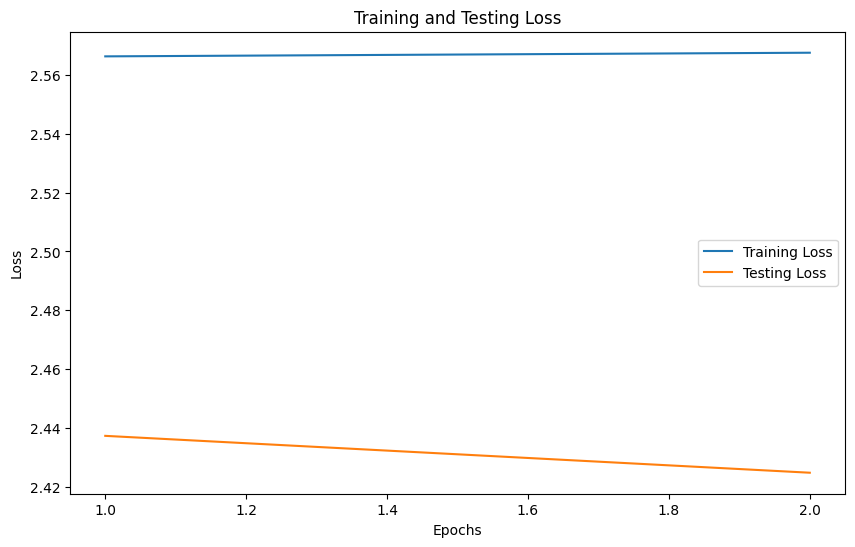

In [137]:
import matplotlib.pyplot as plt

#A
#history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=1)

#changed epoch to 2
#history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=1)

#changed epoch to 3
#history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=1)

#note I changed the batch size to 2 in efforts to get this revised version submitted in time
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=2)

#B Add Binary Cross Entropy

#changed batch size to 2 in efforts of saving time
#C Add another convolution layer

#D Change the kernel size of the convolution layers
#changed kernel size to 6
# model.add(Conv2D(64, kernel_size=6,activation='relu', input_shape=(28,28,1)))  #activation=tf.nn.relu
# model.add(Conv2D(32, kernel_size=6, activation='relu'))

#E Change the no. filters of the convolution layers
#model.add(Conv2D(128, kernel_size=6,activation='relu', input_shape=(28,28,1)))  #activation=tf.nn.relu
#model.add(Conv2D(64, kernel_size=6, activation='relu'))

#F Change the Learning Rate (try 3 different values)
# 0.01
# 0.25
# 0.50


#G Change the batch size
#history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=2)

#history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=4)

#history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=12)

#H Change the activation functions (try 3 different values)
#sigmoid
#tanh
#softplus


# Verify the history object
print(history.history.keys())

# Extract loss values from the history object
training_loss = history.history['loss']
testing_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plotting the training and testing loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, testing_loss, label='Testing Loss')

# Adding titles and labels
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plot
plt.show()


1/1 [==============================] - 0s 79ms/step
Predicted probabilities:
[[1.19858026e-10 6.64092045e-13 9.91778215e-10 5.74074642e-11
  3.12152566e-13 1.36286219e-12 5.44188295e-17 1.00000000e+00
  9.30306110e-10 6.06875350e-09]
 [6.27225605e-09 1.60928334e-06 9.99997139e-01 1.71062418e-08
  1.66926837e-11 8.40410911e-14 3.72725509e-07 4.13262361e-14
  8.26867847e-07 1.12394645e-13]
 [2.25544277e-08 9.99854803e-01 1.31893989e-06 5.00170261e-09
  8.36187780e-07 4.10807019e-07 7.95511653e-07 5.40435821e-08
  1.41727825e-04 3.49753476e-10]
 [9.99999762e-01 3.92813549e-13 1.43072381e-08 1.82231147e-10
  1.25703705e-08 1.73232118e-09 2.30024028e-07 9.95874715e-13
  2.00306730e-10 2.97433544e-08]]
Predicted classes:
[7 2 1 0]


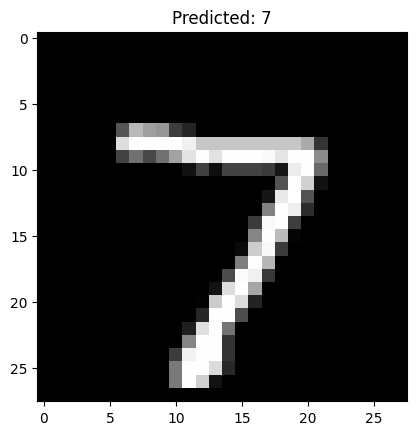

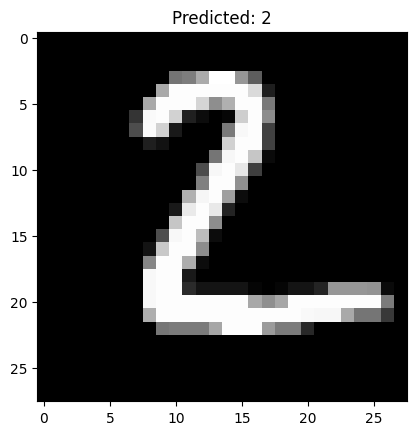

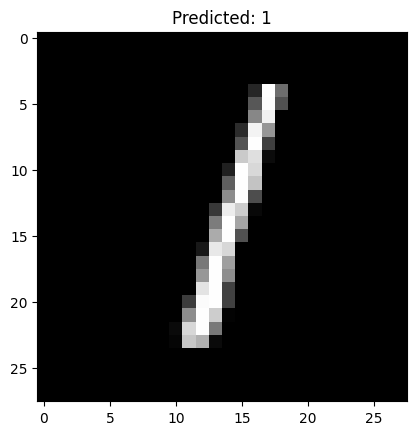

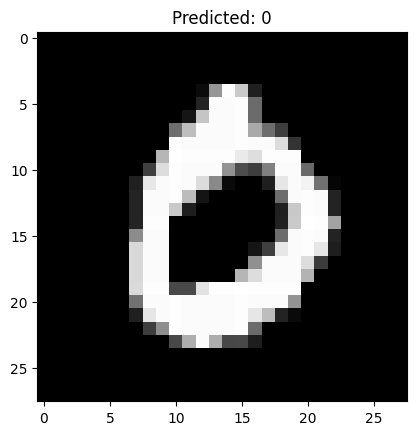

In [30]:
#predict first 4 images in the test set
import numpy as np

# Predict the first 4 images in the test set
predictions = model.predict(X_test[:4])

# Display the predictions
print("Predicted probabilities:")
print(predictions)

# If the task is a multi-class classification (e.g., MNIST), get the predicted class
predicted_classes = np.argmax(predictions, axis=1)
print("Predicted classes:")
print(predicted_classes)

# Optionally, you can display the actual images along with the predictions
import matplotlib.pyplot as plt

for i in range(4):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_classes[i]}")
    plt.show()
